In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install torch torchvision torchaudio numpy pandas scipy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
import os

# Lấy danh sách tất cả file trong thư mục
all_files = os.listdir("/content/drive/MyDrive/dataverse_files/data/csv")

# Lấy danh sách các bệnh nhân (các mã ID duy nhất, VD: "0009_8min")
patient_ids = list(set([f.split("_")[0] for f in all_files if f.endswith("_signal.csv")]))
print("📌 Số lượng bệnh nhân trong dataset:", len(patient_ids))


📌 Số lượng bệnh nhân trong dataset: 42


In [4]:
import pandas as pd
import numpy as np

X_all, Y_all = [], []

for patient_id in patient_ids:
    try:
        # Đọc dữ liệu của bệnh nhân
        signal_file = f"/content/drive/MyDrive/dataverse_files/data/csv/{patient_id}_8min_signal.csv"
        param_file = f"/content/drive/MyDrive/dataverse_files/data/csv/{patient_id}_8min_param.csv"

        signal_df = pd.read_csv(signal_file)
        param_df = pd.read_csv(param_file)
        fs = param_df["samplingrate_pleth"].values[0]  # Tần số lấy mẫu (300 Hz)

        # Lọc nhiễu và chuẩn hóa
        signal_df["pleth_norm"] = (signal_df["pleth_y"] - signal_df["pleth_y"].min()) / \
                                  (signal_df["pleth_y"].max() - signal_df["pleth_y"].min()) * 2 - 1

        signal_df["co2_norm"] = (signal_df["co2_y"] - signal_df["co2_y"].min()) / \
                                (signal_df["co2_y"].max() - signal_df["co2_y"].min())

        # Chia thành cửa sổ 9.6s
        window_size = int(9.6 * fs)  # 2880 mẫu
        stride = int(1 * fs)  # 1 giây

        for i in range(0, len(signal_df) - window_size, stride):
            X_all.append(signal_df["pleth_norm"].values[i:i + window_size])
            Y_all.append(signal_df["co2_norm"].values[i:i + window_size])

        print(f"✅ Xử lý xong bệnh nhân {patient_id}")

    except Exception as e:
        print(f"⚠️ Lỗi khi xử lý bệnh nhân {patient_id}: {e}")

# Chuyển thành NumPy arrays
X_all = np.array(X_all)
Y_all = np.array(Y_all)

print(f"📌 Dữ liệu huấn luyện từ nhiều bệnh nhân: X.shape = {X_all.shape}, Y.shape = {Y_all.shape}")


✅ Xử lý xong bệnh nhân 0030
✅ Xử lý xong bệnh nhân 0016
✅ Xử lý xong bệnh nhân 0038
✅ Xử lý xong bệnh nhân 0149
✅ Xử lý xong bệnh nhân 0331
✅ Xử lý xong bệnh nhân 0325
✅ Xử lý xong bệnh nhân 0018
✅ Xử lý xong bệnh nhân 0123
✅ Xử lý xong bệnh nhân 0103
✅ Xử lý xong bệnh nhân 0142
✅ Xử lý xong bệnh nhân 0134
✅ Xử lý xong bệnh nhân 0121
✅ Xử lý xong bệnh nhân 0032
✅ Xử lý xong bệnh nhân 0023
✅ Xử lý xong bệnh nhân 0313
✅ Xử lý xong bệnh nhân 0311
✅ Xử lý xong bệnh nhân 0031
✅ Xử lý xong bệnh nhân 0332
✅ Xử lý xong bệnh nhân 0147
✅ Xử lý xong bệnh nhân 0127
✅ Xử lý xong bệnh nhân 0148
✅ Xử lý xong bệnh nhân 0015
✅ Xử lý xong bệnh nhân 0115
✅ Xử lý xong bệnh nhân 0329
✅ Xử lý xong bệnh nhân 0328
✅ Xử lý xong bệnh nhân 0104
✅ Xử lý xong bệnh nhân 0150
✅ Xử lý xong bệnh nhân 0309
✅ Xử lý xong bệnh nhân 0133
✅ Xử lý xong bệnh nhân 0330
✅ Xử lý xong bệnh nhân 0128
✅ Xử lý xong bệnh nhân 0029
✅ Xử lý xong bệnh nhân 0312
✅ Xử lý xong bệnh nhân 0370
✅ Xử lý xong bệnh nhân 0125
✅ Xử lý xong bệnh nh

In [6]:
import torch
import torch.nn as nn

class CorrEncoder(nn.Module):
    def __init__(self):
        super(CorrEncoder, self).__init__()

        # Encoder: Trích xuất đặc trưng từ PPG
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=100, stride=1, padding=20),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=75, stride=1, padding=10),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=50, stride=1, padding=5),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3)  # Dropout để tránh overfitting
        )

        # Decoder: Tái tạo tín hiệu CO₂ từ đặc trưng đã trích xuất
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(64, 32, kernel_size=50, stride=1, padding=5),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.ConvTranspose1d(32, 16, kernel_size=75, stride=1, padding=10),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.ConvTranspose1d(16, 1, kernel_size=100, stride=1, padding=20),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
import torch.nn as nn
import torch.optim as optim

# Kiểm tra có GPU không
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Khởi tạo mô hình & chuyển sang GPU nếu có
model = CorrEncoder().to(device)

# Loss function & optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Scheduler để giảm Learning Rate nếu loss không giảm
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

print(f"✅ Mô hình đã được khởi tạo trên {device}")

✅ Mô hình đã được khởi tạo trên cuda


In [8]:
import torch.optim as optim

# Khởi tạo optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Sử dụng Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Huấn luyện với Early Stopping
def train_model(model, train_loader, epochs=10, patience=5):
    best_loss = float("inf")
    patience_counter = 0

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.6f}")

        # Giảm learning rate nếu loss không cải thiện
        scheduler.step(avg_loss)

        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Dừng sớm tại epoch {epoch+1} (Loss không cải thiện trong {patience} epoch)")
            break


In [9]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Giả sử X_all và Y_all đã được chuẩn bị trước
X_tensor = torch.tensor(X_all, dtype=torch.float32).unsqueeze(1)  # Thêm channel cho Conv1D
Y_tensor = torch.tensor(Y_all, dtype=torch.float32).unsqueeze(1)

# Tạo dataset & DataLoader
batch_size = 16  # Dùng batch_size lớn hơn nếu có GPU
dataset = TensorDataset(X_tensor, Y_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

print(f"✅ Dữ liệu Tensor đã chuẩn bị xong! Batch size: {batch_size}")


✅ Dữ liệu Tensor đã chuẩn bị xong! Batch size: 16


In [10]:
def train_model(model, train_loader, epochs=200, patience=5):
    best_loss = float("inf")
    patience_counter = 0

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # Chuyển dữ liệu lên GPU nếu có
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.6f}, LR: {scheduler.optimizer.param_groups[0]['lr']}")

        # Giảm learning rate nếu loss không cải thiện
        scheduler.step(avg_loss)

        # Early stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"⏹ Dừng sớm tại epoch {epoch+1} (Loss không cải thiện trong {patience} epoch)")
            break

# Chạy huấn luyện
train_model(model, train_loader, epochs=200)


Epoch 1, Loss: 0.132812, LR: 0.001
Epoch 2, Loss: 0.107211, LR: 0.001
Epoch 3, Loss: 0.091340, LR: 0.001
Epoch 4, Loss: 0.081938, LR: 0.001
Epoch 5, Loss: 0.076112, LR: 0.001
Epoch 6, Loss: 0.072013, LR: 0.001
Epoch 7, Loss: 0.068778, LR: 0.001
Epoch 8, Loss: 0.065725, LR: 0.001
Epoch 9, Loss: 0.063733, LR: 0.001
Epoch 10, Loss: 0.061979, LR: 0.001
Epoch 11, Loss: 0.059971, LR: 0.001
Epoch 12, Loss: 0.058931, LR: 0.001
Epoch 13, Loss: 0.057300, LR: 0.001
Epoch 14, Loss: 0.056608, LR: 0.001
Epoch 15, Loss: 0.055487, LR: 0.001
Epoch 16, Loss: 0.054117, LR: 0.001
Epoch 17, Loss: 0.053257, LR: 0.001
Epoch 18, Loss: 0.052605, LR: 0.001
Epoch 19, Loss: 0.051877, LR: 0.001
Epoch 20, Loss: 0.051002, LR: 0.001
Epoch 21, Loss: 0.050566, LR: 0.001
Epoch 22, Loss: 0.050070, LR: 0.001
Epoch 23, Loss: 0.049413, LR: 0.001
Epoch 24, Loss: 0.048758, LR: 0.001
Epoch 25, Loss: 0.048064, LR: 0.001
Epoch 26, Loss: 0.047902, LR: 0.001
Epoch 27, Loss: 0.047272, LR: 0.001
Epoch 28, Loss: 0.047072, LR: 0.001
E

# **ĐÁNH GIÁ MÔ HÌNH:**

In [11]:
from sklearn.model_selection import train_test_split
import torch

# Tách 80% dữ liệu để huấn luyện, 20% để kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)

# Chuyển đổi thành Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32).unsqueeze(1)

print(f"📌 Tập huấn luyện: {X_train_tensor.shape}, Tập kiểm tra: {X_test_tensor.shape}")

📌 Tập huấn luyện: torch.Size([15825, 1, 2880]), Tập kiểm tra: torch.Size([3957, 1, 2880])


In [12]:
from torch.utils.data import DataLoader, TensorDataset

# Chuyển dữ liệu sang GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test_tensor, Y_test_tensor = X_test_tensor.to(device), Y_test_tensor.to(device)

# Tạo DataLoader cho tập kiểm tra
batch_size = 32
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [13]:
def evaluate_model(model, test_loader):
    model.eval()
    total_loss = 0
    criterion = torch.nn.MSELoss()

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)
    print(f"✅ Loss trên tập kiểm tra: {avg_loss:.6f}")
    return avg_loss

# Chạy đánh giá
evaluate_model(model, test_loader)


✅ Loss trên tập kiểm tra: 0.020909


0.02090915083704937

# **So sánh tín hiệu CO2 thực tế và dự đoán**

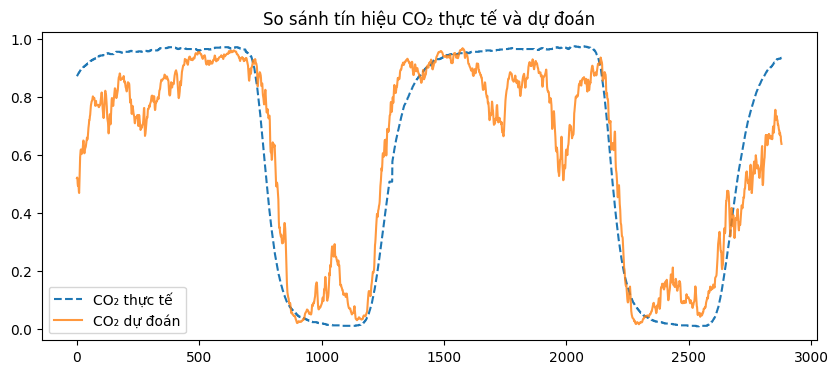

In [14]:
import matplotlib.pyplot as plt

# Chọn một mẫu từ tập kiểm tra
sample_idx = 10
sample_input = X_test_tensor[sample_idx].unsqueeze(0)  # Thêm batch dimension
sample_target = Y_test_tensor[sample_idx].cpu().numpy()

# Dự đoán bằng mô hình
model.eval()
with torch.no_grad():
    predicted_output = model(sample_input.to(device)).cpu().numpy()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 4))
plt.plot(sample_target[0], label="CO₂ thực tế", linestyle="dashed")
plt.plot(predicted_output[0][0], label="CO₂ dự đoán", alpha=0.8)
plt.legend()
plt.title("So sánh tín hiệu CO₂ thực tế và dự đoán")
plt.show()


# **Ước tính nhịp thở (RR) và so sánh**

In [16]:
import numpy as np
from scipy.fft import fft

def estimate_respiratory_rate(signal, fs=300):
    fft_vals = np.abs(fft(signal))  # Lấy giá trị phổ Fourier
    freqs = np.fft.fftfreq(len(signal), d=1/fs)  # Tạo trục tần số

    # Chỉ lấy các giá trị tần số dương
    positive_freqs = freqs[:len(freqs)//2]
    positive_fft_vals = fft_vals[:len(freqs)//2]

    # Giới hạn khoảng tìm kiếm (0.08 - 1 Hz) ~ (5 - 60 bpm)
    min_breathing_freq = 5 / 60  # 5 bpm → Hz
    max_breathing_freq = 60 / 60  # 60 bpm → Hz

    valid_idx = np.where((positive_freqs >= min_breathing_freq) & (positive_freqs <= max_breathing_freq))
    filtered_freqs = positive_freqs[valid_idx]
    filtered_fft_vals = positive_fft_vals[valid_idx]

    # Tìm tần số có biên độ cao nhất trong khoảng hợp lý
    rr_freq = filtered_freqs[np.argmax(filtered_fft_vals)]
    return abs(rr_freq * 60)  # Chuyển đổi từ Hz sang bpm


 Mẫu được chọn ngẫu nhiên: 2647
 Nhịp thở thực tế: 12.50 bpm
 Nhịp thở dự đoán: 12.50 bpm


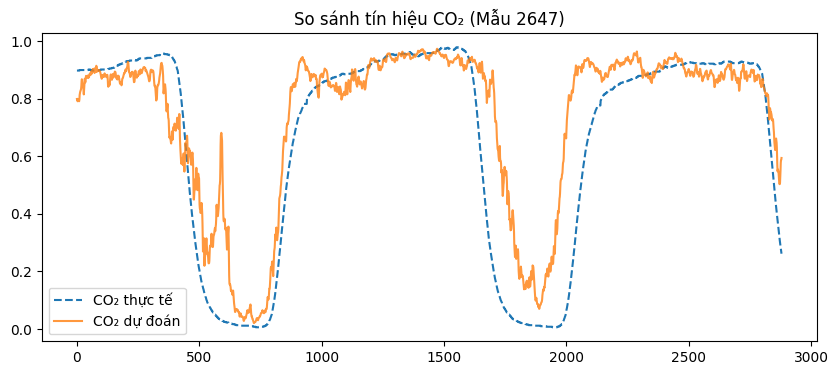

In [43]:
# Chọn mẫu ngẫu nhiên
import random
random_idx = random.randint(0, len(X_test) - 1)
sample_input = X_test_tensor[random_idx].unsqueeze(0)
sample_target = Y_test_tensor[random_idx].cpu().numpy()

# Dự đoán
model.eval()
with torch.no_grad():
    predicted_output = model(sample_input.to(device)).cpu().numpy()

# Tính nhịp thở thực tế và dự đoán
sample_target_rr = estimate_respiratory_rate(sample_target[0])
sample_pred_rr = estimate_respiratory_rate(predicted_output[0][0])

# In kết quả
print(f" Mẫu được chọn ngẫu nhiên: {random_idx}")
print(f" Nhịp thở thực tế: {sample_target_rr:.2f} bpm")
print(f" Nhịp thở dự đoán: {sample_pred_rr:.2f} bpm")

# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(sample_target[0], label="CO₂ thực tế", linestyle="dashed")
plt.plot(predicted_output[0][0], label="CO₂ dự đoán", alpha=0.8)
plt.legend()
plt.title(f"So sánh tín hiệu CO₂ (Mẫu {random_idx})")
plt.show()
